## Name : Muhammad Haris Uddin Siddiqui
## The Spark Foundation 
## #GRIPMAY21
### Task 1: Prediction using Supervised Machine Learning

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
import seaborn as sns

#### Importing dataset

In [2]:
d_set = pd.read_csv("http://bit.ly/w-data")


#### First 5 row of data set

In [3]:
d_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Statistical Analysis

In [4]:
statistics = d_set.describe().reset_index()

In [5]:
statistics.columns = ["Statictics" , "Hours" , "Scores"]

In [6]:
statistics

,Statictics,Hours,Scores
0,count,25.000000,25.000000
1,mean,5.012000,51.480000
2,std,2.525094,25.286887
3,min,1.100000,17.000000
4,25%,2.700000,30.000000
5,50%,4.800000,47.000000
6,75%,7.400000,75.000000
7,max,9.200000,95.000000


#### Quartile 

In [7]:
quartile = statistics.iloc[4:7 , :].reset_index()

In [8]:
quartile

,index,Statictics,Hours,Scores
0,4,25%,2.7,30.0
1,5,50%,4.8,47.0
2,6,75%,7.4,75.0


In [9]:
del quartile["index"]

In [10]:
quartile

,Statictics,Hours,Scores
0,25%,2.7,30.0
1,50%,4.8,47.0
2,75%,7.4,75.0


#### Inter Quartile Range #iqr

In [11]:
iqr = pd.DataFrame({"Statictics" : ["iqr"],
                   "Hours" : [quartile["Hours"][2] - quartile["Hours"][0]],
                   "Scores" : [quartile["Scores"][2] - quartile["Scores"][0]]
                   })
iqr

,Statictics,Hours,Scores
0,iqr,4.7,45.0


In [12]:
quartile = pd.concat([quartile , iqr])

In [13]:
quartile


,Statictics,Hours,Scores
0,25%,2.7,30.0
1,50%,4.8,47.0
2,75%,7.4,75.0
0,iqr,4.7,45.0


In [14]:
quartile

,Statictics,Hours,Scores
0,25%,2.7,30.0
1,50%,4.8,47.0
2,75%,7.4,75.0
0,iqr,4.7,45.0


### Making Barplot 

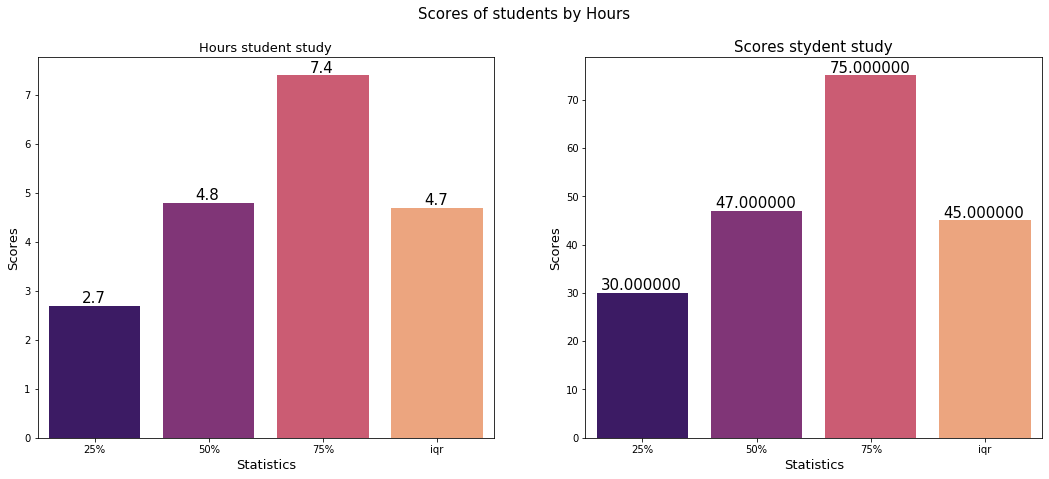

In [15]:
fig , axes = plt.subplots(1,2,figsize = (18,7))
fig.suptitle("Scores of students by Hours" , fontsize = 15)

#Creating Hours Graph 

stat = sns.barplot(ax = axes[0] , x = "Statictics" , y = "Hours" ,data = quartile , palette = "magma")
for i in stat.patches:
    stat.annotate('{:.01f}'.format(i.get_height()),
                 (i.get_x()+0.39, i.get_height()),
                 ha = "center" , va= "bottom" , color ="black" ,size = 15)
axes[0].set_title("Hours student study", size = 13)
axes[0].set_xlabel("Statistics" , size = 13)
axes[0].set_ylabel("Scores" , size = 13)
#Creating Scores Graph

stat1 = sns.barplot(ax = axes[1] , x = "Statictics" , y = "Scores" , data = quartile , palette = "magma")
for j in stat1.patches:
    stat1.annotate('{:01f}'.format(j.get_height()),
                  (j.get_x()+0.39 , j.get_height()),
                  ha="center" , va = "bottom" ,color = "black" , size = 15)
axes[1].set_title("Scores stydent study" , size = 15)
axes[1].set_xlabel('Statistics' , size = 13)
axes[1].set_ylabel("Scores",size = 13)

plt.show()



In [16]:
d_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [17]:
d_set.shape

(25, 2)

In [18]:
d_set.count()

Hours     25
Scores    25
dtype: int64

#### Plotting 

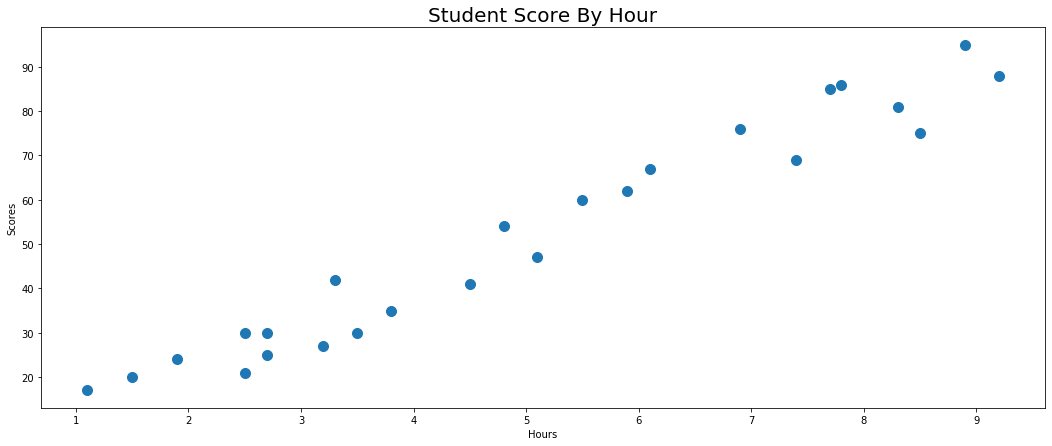

In [19]:
plt.figure(figsize = (18,7))
plt.scatter(x = 'Hours' , y = "Scores" , data = d_set , s=100)
plt.title("Student Score By Hour" , size = 20)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Box Plot

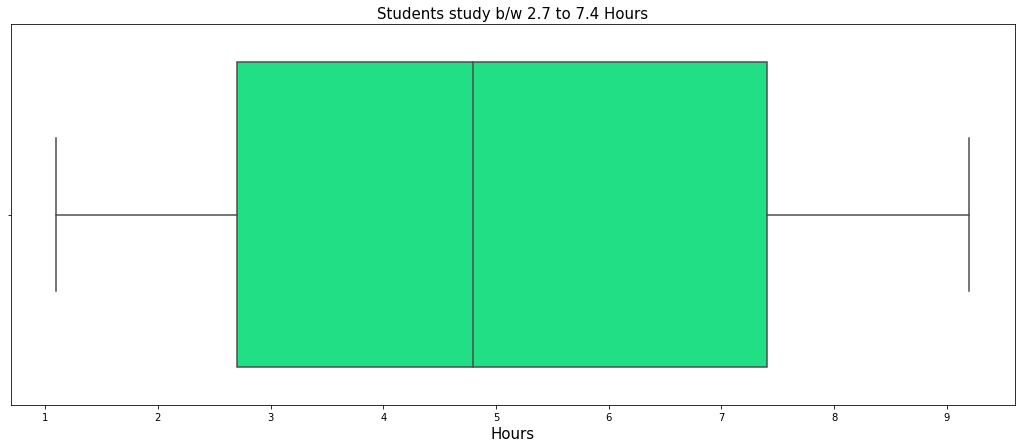

In [20]:
plt.figure(figsize = (18,7))
sns.boxplot(x = d_set["Hours"] , palette = "gist_rainbow_r")
plt.title("Students study b/w 2.7 to 7.4 Hours" , size = 15)
plt.xlabel("Hours" , size = 15)
plt.show()

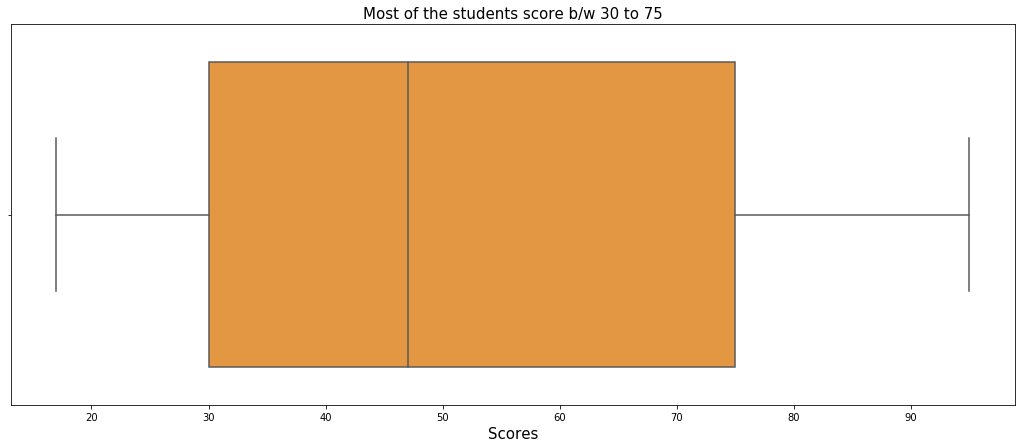

In [21]:
plt.figure(figsize = (18,7))
sns.boxplot(x = d_set["Scores"] , palette = "YlOrBr")
plt.title("Most of the students score b/w 30 to 75",size = 15)
plt.xlabel("Scores",size = 15)
plt.show()

### Histogram

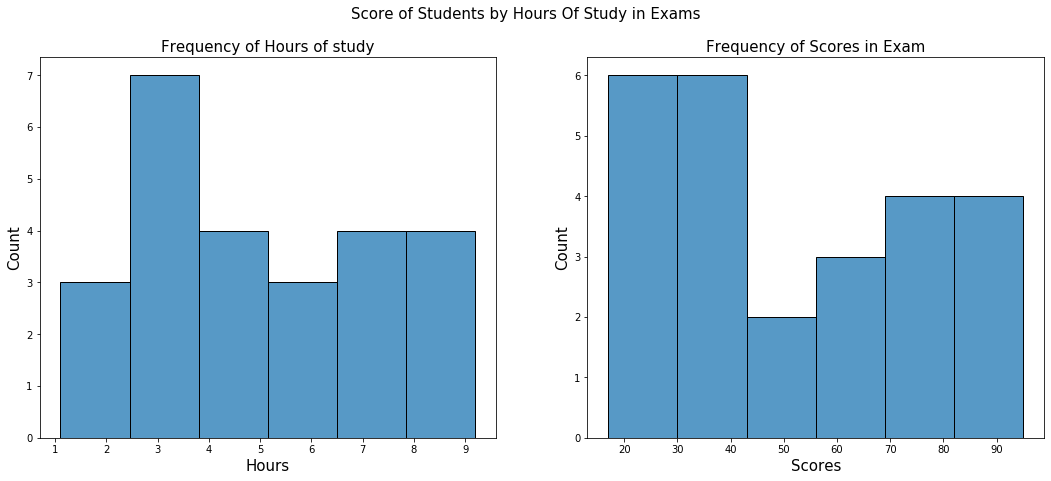

In [22]:
fig , axes = plt.subplots(1,2,figsize = (18,7))
fig.suptitle("Score of Students by Hours Of Study in Exams" , fontsize = 15)

sns.histplot(ax = axes[0] , data = d_set , x = "Hours")
axes[0].set_title("Frequency of Hours of study",size = 15)
axes[0].set_xlabel("Hours" , size = 15)
axes[0].set_ylabel("Count" ,size = 15)

sns.histplot(ax = axes[1] , data = d_set , x = "Scores")
axes[1].set_title("Frequency of Scores in Exam",size = 15)
axes[1].set_xlabel("Scores" , size = 15)
axes[1].set_ylabel("Count", size = 15)
plt.show()



In [23]:
#checking students pass or fail


In [24]:
d_set["Status"] = d_set["Scores"] > 50
d_set

,Hours,Scores,Status
0,2.5,21,False
1,5.1,47,False
2,3.2,27,False
3,8.5,75,True
4,3.5,30,False
5,1.5,20,False
6,9.2,88,True
7,5.5,60,True
8,8.3,81,True
9,2.7,25,False


In [25]:
d_set["Status"] = d_set["Status"].replace([True,False], ["Pass", "Fail"])
d_set.head()

,Hours,Scores,Status
0,2.5,21,Fail
1,5.1,47,Fail
2,3.2,27,Fail
3,8.5,75,Pass
4,3.5,30,Fail


In [26]:
pass_fail = d_set["Status"].value_counts().reset_index()

In [27]:
pass_fail.columns = ["Status" , "Students"]
pass_fail

,Status,Students
0,Fail,13
1,Pass,12


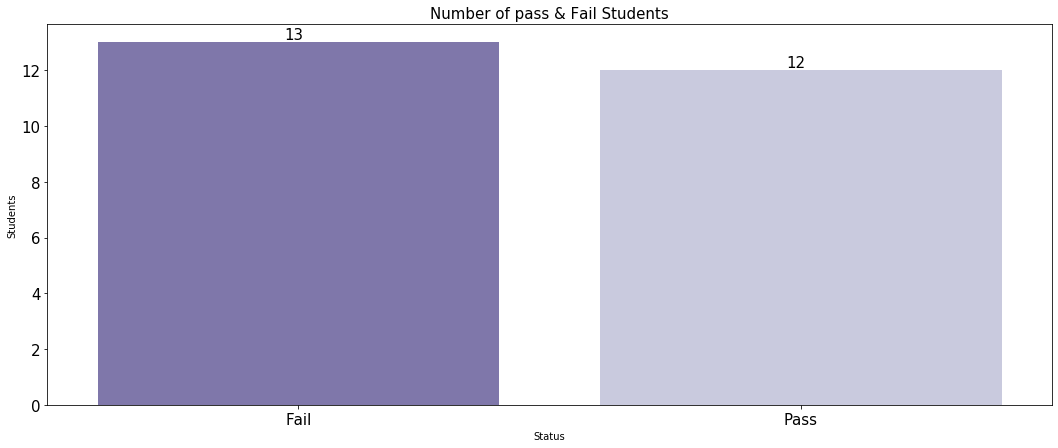

In [28]:
plt.figure(figsize = (18,7))
plot = sns.barplot(x = "Status" , y = "Students" , data = pass_fail ,palette = "Purples_r" )
for k in plot.patches:
    plot.annotate("{:.0f}".format(k.get_height()),
                 (k.get_x()+0.39, k.get_height()),
                 ha = "center" , va = "bottom" , color = "black" ,size = 15)
plt.title("Number of pass & Fail Students" , size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Correlation

In [31]:
pearson_coef , p_value = stats.pearsonr(d_set["Scores"], d_set["Hours"])
print("Pearson Coefficient: " , pearson_coef)
print("P_value: ",p_value)

Pearson Coefficient:  0.9761906560220884
P_value:  9.132624467460325e-17


In [32]:
correlation = d_set.corr()

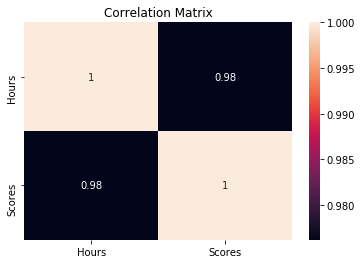

In [33]:
sns.heatmap(correlation , annot = True)
plt.title("Correlation Matrix")
plt.show()

In [34]:
d_set_gr_on = d_set[["Status" , "Hours" , "Scores"]]
xy = d_set_gr_on.groupby(["Status", "Hours"])
data = xy.first()
data

Scores
Status Hours        
Fail   1.1        17
       1.5        20
       1.9        24
       2.5        21
       2.7        25
       3.2        27
       3.3        42
       3.5        30
       3.8        35
       4.5        41
       5.1        47
Pass   4.8        54
       5.5        60
       5.9        62
       6.1        67
       6.9        76
       7.4        69
       7.7        85
       7.8        86
       8.3        81
       8.5        75
       8.9        95
       9.2        88

In [36]:
Fail = d_set[d_set["Status"]  == "Fail"]
del Fail["Status"]
Fail

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
4,3.5,30
5,1.5,20
9,2.7,25
12,4.5,41
13,3.3,42
14,1.1,17
16,2.5,30


In [37]:
Pass = d_set[d_set["Status"] == "Pass"]
del Pass["Status"]
Pass

,Hours,Scores
3,8.5,75
6,9.2,88
7,5.5,60
8,8.3,81
10,7.7,85
11,5.9,62
15,8.9,95
18,6.1,67
19,7.4,69
21,4.8,54


### Scatter

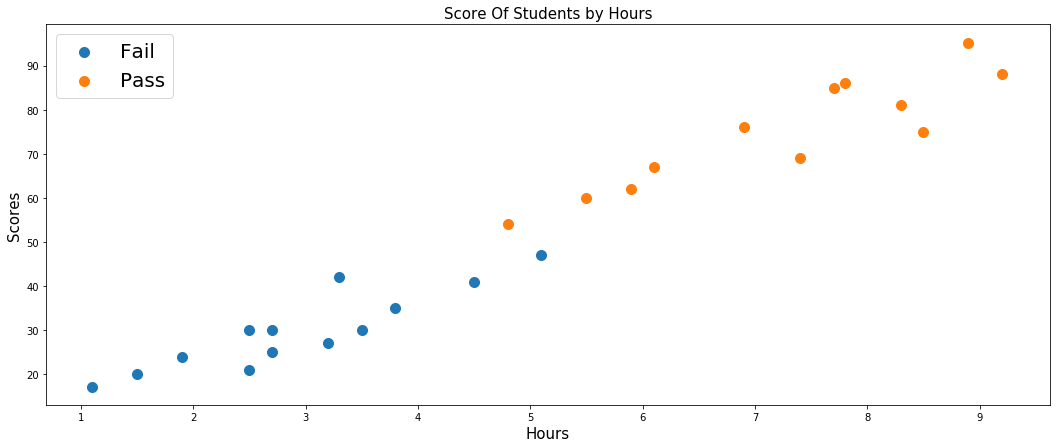

In [39]:
fig , ax = plt.subplots(figsize = (18,7))
ax.scatter (x = Fail["Hours"], y = Fail["Scores"], s = 100, label = "Fail")
ax.scatter (x = Pass["Hours"], y = Pass["Scores"], s = 100, label = "Pass")
plt.title("Score Of Students by Hours" , size = 15)
plt.xlabel("Hours" , size = 15)
plt.ylabel("Scores" , size = 15)
plt.legend(fontsize = 20)
plt.show()

In [40]:
### Regression plot

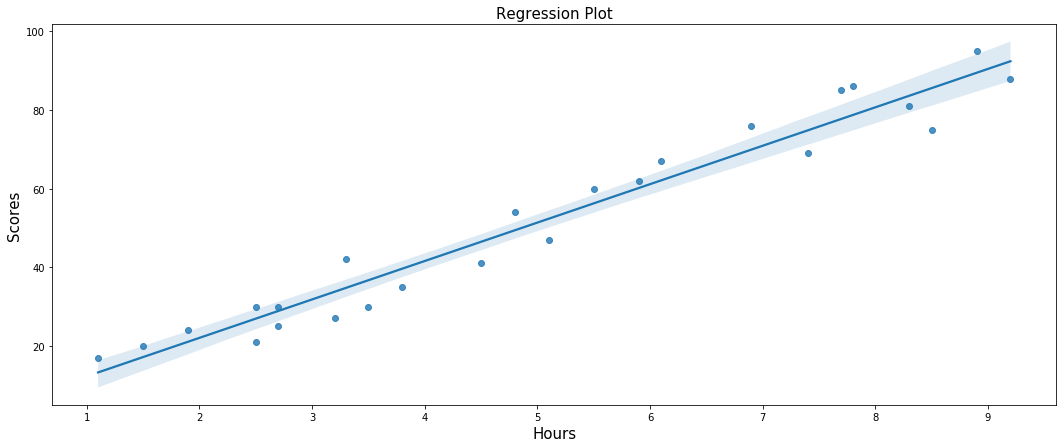

In [45]:
plt.figure(figsize = (18,7))
sns.regplot(x = "Hours" , y = "Scores" , data = d_set)
plt.title("Regression Plot" , size = 15)
plt.xlabel("Hours" , size = 15)
plt.ylabel("Scores" , size =15)
plt.show()

### Linear Reegression: Prediction on Full Data

In [50]:
X = d_set[["Hours"]]
y = d_set["Scores"]

x_train , x_test , y_train , y_test = train_test_split(X,y, test_size = 0.25 , random_state = 0)
lr = LinearRegression()
lr.fit(x_train , y_train)
y_predict = lr.predict(X)

In [51]:
comparison = pd.DataFrame({"Actual" : y , "Predicted" : y_predict})
comparison

,Actual,Predicted
0,21,26.786400
1,47,52.634764
2,27,33.745575
3,75,86.436470
4,30,36.728078
5,20,16.844722
6,88,93.395645
7,60,56.611435
8,81,84.448134
9,25,28.774736


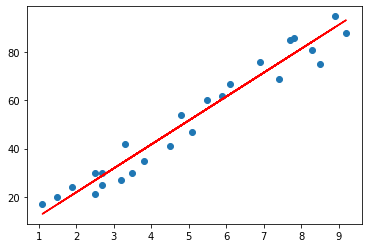

In [52]:
plt.scatter(X,y)
plt.plot(X,y_predict , color = "r")
plt.show()

## Actual and predicted Values plot


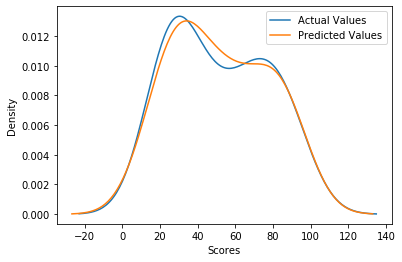

In [53]:
sns.kdeplot(data = X , x = y , label = "Actual Values")
sns.kdeplot(data = X , x = y_predict , label = "Predicted Values")
plt.legend()
plt.show()

### Pediction Score

In [54]:
test_score = lr.score(x_test,y_test)
test_score

0.9367661043365056

In [56]:
#Predicting
X= d_set[["Hours"]]
y = d_set["Scores"]

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 0)
lr.fit(x_train , y_train)

y_predict = lr.predict(x_test)
print(y_predict)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [58]:
#Predicted and Actual Values
comparison = pd.DataFrame({"Actual" : y_test , "Predicted" : y_predict})
comparison

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


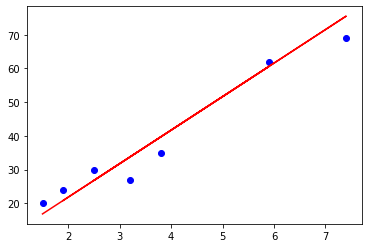

In [59]:
#Scatter plot
plt.scatter(x_test,y_test,color = "blue")
plt.plot(x_test,y_predict,"r")
plt.show()

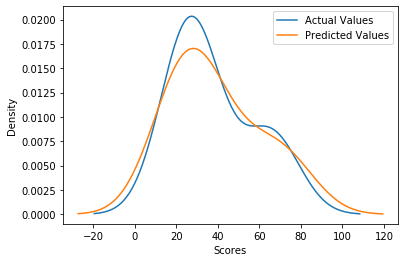

In [60]:
#Actual and Predicted Values Plot
sns.kdeplot(data=x_test , x = y_test , label = "Actual Values")
sns.kdeplot(data=x_test , x = y_predict , label = "Predicted Values")
plt.legend()
plt.show()

In [62]:
#Prediction Score
test_score = lr.score(x_test , y_test)
test_score

0.9367661043365056

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [64]:
hours = 9.25
prdiction = lr.predict([[hours]])
print("Number of Hours = " +str(hours))
print("Predicted Score = " +str(prdiction[0]))

Number of Hours = 9.25
Predicted Score = 93.89272889341652


In [65]:
### Mean Squared Error
mse = metrics.mean_absolute_error(y_test , y_predict)
mse

4.130879918502481